In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn.linear_model as lm
from keras.models import Sequential
from keras.layers import Dense
import numpy
%matplotlib inline
import tensorflow
import keras

In [13]:
import math

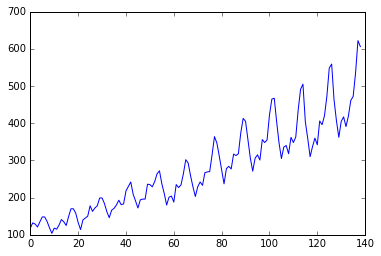

In [2]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [ ]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t)
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense


# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX

# # create and fit Multilayer Perceptron model
# model = Sequential()
# model.add(Dense(8, input_dim=look_back, activation='relu'))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)

# # Estimate model performance
# trainScore = model.evaluate(trainX, trainY, verbose=0)
# print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
# testScore = model.evaluate(testX, testY, verbose=0)
# print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# # generate predictions for training
# trainPredict = model.predict(trainX)
# testPredict = model.predict(testX)
# # shift train predictions for plotting
# trainPredictPlot = numpy.empty_like(dataset)
# trainPredictPlot[:, :] = numpy.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# # shift test predictions for plotting
# testPredictPlot = numpy.empty_like(dataset)
# testPredictPlot[:, :] = numpy.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# # plot baseline and predictions
# plt.plot(dataset)
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()

In [125]:
mldf = pandas.read_csv('mltest.csv', engine='python')

# dataset.columns
mldata= mldf.ix[:,[3,4,5,6,8,9,10,11,7]].copy()
# 星期轉換數字
mldata.replace(to_replace='Sun',value=6,inplace=True );mldata
mldata.replace(to_replace='Sat',value=5,inplace=True );mldata
mldata.replace(to_replace='Fri',value=4,inplace=True );mldata
mldata.replace(to_replace='Thu',value=3,inplace=True );mldata
mldata.replace(to_replace='Wed',value=2,inplace=True );mldata
mldata.replace(to_replace='Tue',value=1,inplace=True );mldata
mldata.replace(to_replace='Mon',value=0,inplace=True );mldata
mldata.columns = ['a','b','c','d','e','f','g','h','i']
mldata.c=pd.to_datetime(mldata.c);
mldata.c= mldata.c.dt.dayofyear;mldata
mldata.replace(to_replace='00:00:00',value=0,inplace=True );mldata
mldata.replace(to_replace='01:00:00',value=1,inplace=True );mldata
mldata.replace(to_replace='02:00:00',value=2,inplace=True );mldata
mldata.replace(to_replace='03:00:00',value=3,inplace=True );mldata
mldata.replace(to_replace='04:00:00',value=4,inplace=True );mldata
mldata.replace(to_replace='05:00:00',value=5,inplace=True );mldata
mldata.replace(to_replace='06:00:00',value=6,inplace=True );mldata
mldata.replace(to_replace='07:00:00',value=7,inplace=True );mldata
mldata.replace(to_replace='08:00:00',value=8,inplace=True );mldata
mldata.replace(to_replace='09:00:00',value=9,inplace=True );mldata
mldata.replace(to_replace='10:00:00',value=10,inplace=True );mldata
mldata.replace(to_replace='11:00:00',value=11,inplace=True );mldata
mldata.replace(to_replace='12:00:00',value=12,inplace=True );mldata
mldata.replace(to_replace='13:00:00',value=13,inplace=True );mldata
mldata.replace(to_replace='14:00:00',value=14,inplace=True );mldata
mldata.replace(to_replace='15:00:00',value=15,inplace=True );mldata
mldata.replace(to_replace='16:00:00',value=16,inplace=True );mldata
mldata.replace(to_replace='17:00:00',value=17,inplace=True );mldata
mldata.replace(to_replace='18:00:00',value=18,inplace=True );mldata
mldata.replace(to_replace='19:00:00',value=19,inplace=True );mldata
mldata.replace(to_replace='20:00:00',value=20,inplace=True );mldata
mldata.replace(to_replace='21:00:00',value=21,inplace=True );mldata
mldata.replace(to_replace='22:00:00',value=22,inplace=True );mldata
mldata.replace(to_replace='23:00:00',value=23,inplace=True );mldata
mldata.replace(to_replace='東',value=1,inplace=True );mldata


mlva = mldata.values
mlva = mlva.astype('float32')

train_size = int(len(mlva) * 0.67)
test_size = len(mlva) - train_size
train, test = mlva[0:train_size,:], mlva[train_size:len(mlva),:]

trainX, trainY = [],[]

trainX.append(train[:,0:8])
trainY.append(train[:,8])

testX, testY = [],[]
testX.append(test[:,0:8])
testY.append(test[:,8])

# create and fit Multilayer Perceptron model




In [147]:
# create and fit Multilayer Perceptron model
model = Sequential()



model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=0)





In [146]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 2275.31 MSE (47.70 RMSE)
Test Score: 2502.19 MSE (50.02 RMSE)


In [136]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

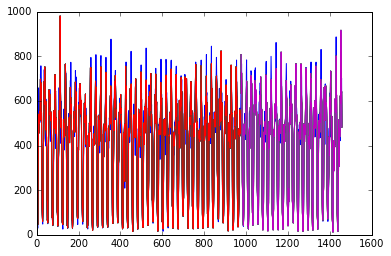

In [137]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(mlva)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[:len(trainPredict), :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(mlva)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict):len(mlva), :] = testPredict
# plot baseline and predictions
plt.plot(mlva[:,-1])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense


# # convert an array of values into a dataset matrix


# def create_dataset(dataset, look_back=1):
# 	dataX, dataY = [], []
# 	for i in range(len(dataset)-look_back-1):
# 		a = dataset[i:(i+look_back), 0]
# 		dataX.append(a)
# 		dataY.append(dataset[i + look_back, 0])
# 	return numpy.array(dataX), numpy.array(dataY)



# fix random seed for reproducibility



numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print(len(train), len(test))
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()



model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)


# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

(93, 46)
Epoch 1/200
0s - loss: 37166.7681
Epoch 2/200
0s - loss: 19634.1849
Epoch 3/200
0s - loss: 8125.6654
Epoch 4/200
0s - loss: 2747.8574
Epoch 5/200
0s - loss: 1446.6261
Epoch 6/200
0s - loss: 1273.5362
Epoch 7/200
0s - loss: 1237.9971
Epoch 8/200
0s - loss: 1231.3606
Epoch 9/200
0s - loss: 1243.4859
Epoch 10/200
0s - loss: 1210.2883
Epoch 11/200
0s - loss: 1184.0110
Epoch 12/200
0s - loss: 1204.5295
Epoch 13/200
0s - loss: 1172.2676
Epoch 14/200
0s - loss: 1162.1484
Epoch 15/200
0s - loss: 1141.3422
Epoch 16/200
0s - loss: 1134.3296
Epoch 17/200
0s - loss: 1132.6506
Epoch 18/200
0s - loss: 1109.4764
Epoch 19/200
0s - loss: 1075.0037
Epoch 20/200
0s - loss: 1045.1270
Epoch 21/200
0s - loss: 1028.0536
Epoch 22/200
0s - loss: 1019.8836
Epoch 23/200
0s - loss: 989.6351
Epoch 24/200
0s - loss: 960.6920
Epoch 25/200
0s - loss: 947.5737
Epoch 26/200
0s - loss: 919.7069
Epoch 27/200
0s - loss: 921.8426
Epoch 28/200
0s - loss: 881.7614
Epoch 29/200
0s - loss: 859.6081
Epoch 30/200
0s - l